In [1]:
import pandas as pd
import numpy as np
import os, pickle
import seaborn as sns
import matplotlib.pyplot as plt
import re
from datetime import datetime, time

In [2]:
#list all files in data folder
files = os.listdir('dataset ')

In [3]:
files

['weather_legs.csv',
 'legs.csv',
 'user_details.csv',
 'experience_factors.csv',
 'mots.csv',
 'user_generic_worthwhileness_values.csv',
 'worthwhileness_elements_from_trips.csv',
 'activities.csv',
 'user_specific_worthwhileness_values.csv',
 'legs_coordinates.csv',
 '.ipynb_checkpoints',
 'trips.csv',
 'purposes.csv']

In [4]:
files[0].replace(".csv","")
#load files[0] in a dataframe
df = pd.read_csv('dataset /'+files[0], low_memory=False)

In [5]:
datas={}
for file in files:
    if file != '.ipynb_checkpoints':
        datas[file.replace(".csv","")]=pd.read_csv('dataset /'+file, low_memory=False)

In [6]:
datas.keys()

dict_keys(['weather_legs', 'legs', 'user_details', 'experience_factors', 'mots', 'user_generic_worthwhileness_values', 'worthwhileness_elements_from_trips', 'activities', 'user_specific_worthwhileness_values', 'legs_coordinates', 'trips', 'purposes'])

In [7]:
datas['legs']['dateonly']=datas['legs']['start_date'].apply(lambda x: x.split(' ')[0])

In [12]:
datas['legs']['campaign'].unique()

array(['AAA', 'BEL', 'HRV', 'FIN', 'FRA', 'ITA', 'NOR', 'PRT', 'SVK',
       'ESP', 'CHE'], dtype=object)

In [13]:
def extract_time_from_string(string):
    match = re.search(r'\d{2}:\d{2}:\d{2}', string)
    if match:
        return match.group()
    else:
        return None

In [14]:
datas['legs']['start_time']=datas['legs']['start_date'].apply(extract_time_from_string)

In [15]:
def convert_in_seconds(string): 
    numbers = re.findall(r'\d+', string)  # Find all numeric substrings
    total_sum = 3600 * int(numbers[0]) + 60 * int(numbers[1]) + int(numbers[2])
    return total_sum

In [16]:
datas['legs']['time_in_seconds']=datas['legs']['start_time'].apply(convert_in_seconds)

In [17]:
datas['legs']

,legid,class,userid,tripid,motid,start_date,end_date,true_distance,leg_distance,leg_duration,worthwhileness_rating,transport_category,campaign,weekday,weekday_class,dateonly,start_time,time_in_seconds
0,#24:3498,Leg,o3QNooVleBR9WfbIaCqsaj3DlDl2,#32:1461,7,2019-05-06 16:26:16.773,2019-05-06 16:38:30.295,497.0,218.0,0.0,5.0,walking,AAA,Monday,Working_day,2019-05-06,16:26:16,59176
1,#25:3400,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#31:1449,7,2019-05-07 14:31:11.110,2019-05-07 14:36:22.474,0.0,385.0,0.0,4.0,walking,BEL,Tuesday,Working_day,2019-05-07,14:31:11,52271
2,#25:3460,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#30:1498,7,2019-05-07 15:40:10.952,2019-05-07 15:43:29.090,37.0,37.0,0.0,3.0,walking,BEL,Tuesday,Working_day,2019-05-07,15:40:10,56410
3,#24:3479,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#33:1435,1,2019-05-07 15:54:37.610,2019-05-07 16:00:42.174,0.0,580.0,0.0,3.0,cycling_emerging_micromobility,BEL,Tuesday,Working_day,2019-05-07,15:54:37,57277
4,#23:5342,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#33:2147,9,2019-05-21 04:45:12.391,2019-05-21 04:47:30.021,658.0,658.0,0.0,5.0,private_motorized,BEL,Tuesday,Working_day,2019-05-21,04:45:12,17112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158892,#222:47082,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#131:20807,7,2019-11-28 12:04:33.538,2019-11-28 12:10:38.924,206.0,206.0,365.0,-1.0,walking,CHE,Thursday,Working_day,2019-11-28,12:04:33,43473
158893,#223:47077,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#131:20807,9,2019-11-28 12:10:38.924,2019-11-28 12:25:37.025,4957.0,4957.0,0.0,3.0,private_motorized,CHE,Thursday,Working_day,2019-11-28,12:10:38,43838
158894,#224:47071,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#131:20807,7,2019-11-28 12:25:37.025,2019-11-28 12:27:53.168,364.0,364.0,0.0,-1.0,walking,CHE,Thursday,Working_day,2019-11-28,12:25:37,44737
158895,#224:47070,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#130:20811,7,2019-11-28 16:36:57.975,2019-11-28 16:38:29.151,78.0,78.0,0.0,-1.0,walking,CHE,Thursday,Working_day,2019-11-28,16:36:57,59817


In [18]:
def assign_time_period(time):
    if time  >= 18001 and time <= 28800 : #from 5 to 8 AM
        return 'Early Morning'
    elif time >= 28801 and time <= 39600 : #from 8 to 11 AM 
        return 'Morning'
    elif time >= 39601 and time <= 50400 : #from 11 AM to 2 PM
        return 'Lunch'
    elif time >= 50401 and time <= 57600 : #from 2 to 4 PM
        return 'Early Afternoon'
    elif time >= 57601 and time <= 64800 : #from 4 to 6 PM
        return 'Afternoon'
    elif time >=  64801 and time <= 72000 : #from 6 to 8 PM
        return 'Early Evening'
    elif time >= 72001 and time <= 79200 : #from 8 to 10 PM
        return 'Evening'
    elif time >= 79200 and time <= 0 : #from 10 PM to 00
        return 'Late Evening'
    elif time >= 1 and time <= 18000 :
        return 'Night'
    else:
        return None

In [19]:
datas['legs']['TimePeriod'] = datas['legs']['time_in_seconds'].apply(assign_time_period)
datas['legs']

,legid,class,userid,tripid,motid,start_date,end_date,true_distance,leg_distance,leg_duration,worthwhileness_rating,transport_category,campaign,weekday,weekday_class,dateonly,start_time,time_in_seconds,TimePeriod
0,#24:3498,Leg,o3QNooVleBR9WfbIaCqsaj3DlDl2,#32:1461,7,2019-05-06 16:26:16.773,2019-05-06 16:38:30.295,497.0,218.0,0.0,5.0,walking,AAA,Monday,Working_day,2019-05-06,16:26:16,59176,Afternoon
1,#25:3400,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#31:1449,7,2019-05-07 14:31:11.110,2019-05-07 14:36:22.474,0.0,385.0,0.0,4.0,walking,BEL,Tuesday,Working_day,2019-05-07,14:31:11,52271,Early Afternoon
2,#25:3460,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#30:1498,7,2019-05-07 15:40:10.952,2019-05-07 15:43:29.090,37.0,37.0,0.0,3.0,walking,BEL,Tuesday,Working_day,2019-05-07,15:40:10,56410,Early Afternoon
3,#24:3479,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#33:1435,1,2019-05-07 15:54:37.610,2019-05-07 16:00:42.174,0.0,580.0,0.0,3.0,cycling_emerging_micromobility,BEL,Tuesday,Working_day,2019-05-07,15:54:37,57277,Early Afternoon
4,#23:5342,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#33:2147,9,2019-05-21 04:45:12.391,2019-05-21 04:47:30.021,658.0,658.0,0.0,5.0,private_motorized,BEL,Tuesday,Working_day,2019-05-21,04:45:12,17112,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158892,#222:47082,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#131:20807,7,2019-11-28 12:04:33.538,2019-11-28 12:10:38.924,206.0,206.0,365.0,-1.0,walking,CHE,Thursday,Working_day,2019-11-28,12:04:33,43473,Lunch
158893,#223:47077,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#131:20807,9,2019-11-28 12:10:38.924,2019-11-28 12:25:37.025,4957.0,4957.0,0.0,3.0,private_motorized,CHE,Thursday,Working_day,2019-11-28,12:10:38,43838,Lunch
158894,#224:47071,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#131:20807,7,2019-11-28 12:25:37.025,2019-11-28 12:27:53.168,364.0,364.0,0.0,-1.0,walking,CHE,Thursday,Working_day,2019-11-28,12:25:37,44737,Lunch
158895,#224:47070,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#130:20811,7,2019-11-28 16:36:57.975,2019-11-28 16:38:29.151,78.0,78.0,0.0,-1.0,walking,CHE,Thursday,Working_day,2019-11-28,16:36:57,59817,Afternoon


In [20]:
legs_df = pd.merge(datas['legs'], datas['user_details'], on = 'userid')
legs_df

,legid,class,userid,tripid,motid,start_date,end_date,true_distance,leg_distance,leg_duration,...,gender,age_range,lang,city,country,education_level,marital_status_household,number_people_household,labour_status_household,years_of_residence_household
0,#24:3498,Leg,o3QNooVleBR9WfbIaCqsaj3DlDl2,#32:1461,7,2019-05-06 16:26:16.773,2019-05-06 16:38:30.295,497.0,218.0,0.0,...,Male,16-24,eng,Lisboa,PRT,NaN,NaN,NaN,NaN,NaN
1,#25:3400,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#31:1449,7,2019-05-07 14:31:11.110,2019-05-07 14:36:22.474,0.0,385.0,0.0,...,Male,25-49,dut,Brussels,BEL,NaN,NaN,NaN,NaN,NaN
2,#25:3460,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#30:1498,7,2019-05-07 15:40:10.952,2019-05-07 15:43:29.090,37.0,37.0,0.0,...,Male,25-49,dut,Brussels,BEL,NaN,NaN,NaN,NaN,NaN
3,#24:3479,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#33:1435,1,2019-05-07 15:54:37.610,2019-05-07 16:00:42.174,0.0,580.0,0.0,...,Male,25-49,dut,Brussels,BEL,NaN,NaN,NaN,NaN,NaN
4,#23:5342,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#33:2147,9,2019-05-21 04:45:12.391,2019-05-21 04:47:30.021,658.0,658.0,0.0,...,Male,25-49,dut,Brussels,BEL,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158892,#222:47082,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#131:20807,7,2019-11-28 12:04:33.538,2019-11-28 12:10:38.924,206.0,206.0,365.0,...,Male,25-49,NaN,Lausanne,CHE,NaN,NaN,NaN,NaN,NaN
158893,#223:47077,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#131:20807,9,2019-11-28 12:10:38.924,2019-11-28 12:25:37.025,4957.0,4957.0,0.0,...,Male,25-49,NaN,Lausanne,CHE,NaN,NaN,NaN,NaN,NaN
158894,#224:47071,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#131:20807,7,2019-11-28 12:25:37.025,2019-11-28 12:27:53.168,364.0,364.0,0.0,...,Male,25-49,NaN,Lausanne,CHE,NaN,NaN,NaN,NaN,NaN
158895,#224:47070,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#130:20811,7,2019-11-28 16:36:57.975,2019-11-28 16:38:29.151,78.0,78.0,0.0,...,Male,25-49,NaN,Lausanne,CHE,NaN,NaN,NaN,NaN,NaN


In [21]:
legs_df.groupby(['gender', 'TimePeriod']).sum()

motid  true_distance  leg_distance  leg_duration  \
gender TimePeriod                                                           
Female Afternoon         66545   2.364630e+07  3.785558e+07   1067206.098   
       Early Afternoon   80596   3.198270e+07  5.114627e+07   1201064.615   
       Early Evening     36972   1.225119e+07  2.026397e+07    543546.002   
       Early Morning     75144   3.000083e+07  4.781652e+07   1420598.983   
       Evening           13063   4.880394e+06  7.967974e+06    236957.002   
       Lunch            102517   3.827930e+07  6.170092e+07   1445375.581   
       Morning           74943   2.719821e+07  4.104394e+07   1049757.201   
       Night             14228   9.941044e+06  1.417653e+07    309743.618   
Male   Afternoon        102598   4.976535e+07  7.036630e+07   1404377.673   
       Early Afternoon  111223   5.635130e+07  8.319990e+07   1836485.164   
       Early Evening     59134   2.434692e+07  3.408138e+07    818082.583   
       Early Morning    119680   6.420066e+07  9.309265e+07   2253812.351   
       Evening           26592   1.296040e+07  1.733472e+07    317872.179   
       Lunch            134216   5.878204e+07  8.743709e+07   1921538.101   
       Morning          118257   4.733216e+07  6.581012e+07   1755538.947   
       Night             23144   1.677454e+07  2.859177e+07    476953.158   
Other  Afternoon           555   3.005594e+05  2.167896e+05      5626.879   
       Early Afternoon     472   8.694621e+05  8.885481e+05     10138.888   
       Early Evening       265   2.990590e+05  3.103490e+05       270.000   
       Early Morning       536   3.715700e+05  4.122730e+05      5429.000   
       Evening             166   3.881400e+04  4.670900e+04       768.000   
       Lunch               548   5.460223e+04  1.790862e+05      6984.386   
       Morning             466   2.568180e+05  2.790390e+05      6841.222   
       Night               145   6.273050e+05  6.486010e+05      4258.000   

                        worthwhileness_rating  time_in_seconds  
gender TimePeriod                                               
Female Afternoon                     9295.882        521393268  
       Early Afternoon              10342.715        565570841  
       Early Evening                 5740.212        308465576  
       Early Morning                12509.078        224729524  
       Evening                       2593.006        113915482  
       Lunch                        13865.947        610705633  
       Morning                      10351.977        343167089  
       Night                         2539.533         23410987  
Male   Afternoon                    13047.687        893182005  
       Early Afternoon              13409.503        869558044  
       Early Evening                 8914.183        535377646  
       Early Morning                19344.953        388926439  
       Evening                       4648.665        264092707  
       Lunch                        18180.255        850651904  
       Morning                      15133.989        582899306  
       Night                         3281.032         39687612  
Other  Afternoon                       26.667          4247335  
       Early Afternoon                 84.000          3283532  
       Early Evening                   21.500          2057014  
       Early Morning                   35.000          1517415  
       Evening                          2.000          1567554  
       Lunch                          -31.000          3061012  
       Morning                         34.000          2253813  
       Night                           10.000           243631

In [30]:
#Return relative frequency of time period per each gender
time_dist = legs_df.drop_duplicates(subset='tripid').groupby(['gender', 'TimePeriod']).size() / legs_df.dropna(subset=['TimePeriod']).groupby('gender').size()
time_dist 

gender  TimePeriod     
Female  Afternoon          0.056430
        Early Afternoon    0.066181
        Early Evening      0.031985
        Early Morning      0.074675
        Evening            0.013337
        Lunch              0.090609
        Morning            0.065963
        Night              0.015230
Male    Afternoon          0.054695
        Early Afternoon    0.060225
        Early Evening      0.032821
        Early Morning      0.075622
        Evening            0.016323
        Lunch              0.076826
        Morning            0.065354
        Night              0.013872
Other   Afternoon          0.048223
        Early Afternoon    0.060914
        Early Evening      0.022843
        Early Morning      0.060914
        Evening            0.012690
        Lunch              0.040609
        Morning            0.053299
        Night              0.020305
dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

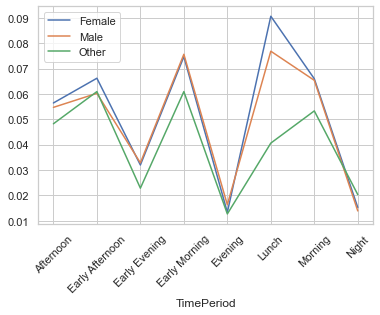

In [31]:
sns.set_theme(style="whitegrid")
sns.lineplot(x=time_dist['Female'].index, y=time_dist['Female'].values,legend='brief',label='Female')
sns.lineplot(x=time_dist['Male'].index, y=time_dist['Male'].values,legend='brief',label='Male')
sns.lineplot(x=time_dist['Other'].index, y=time_dist['Other'].values,legend='brief',label='Other')


plt.xticks(rotation=45)

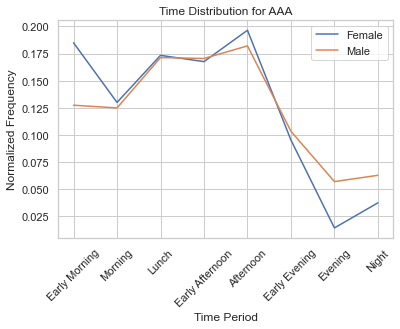

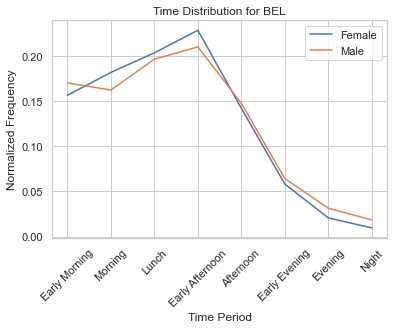

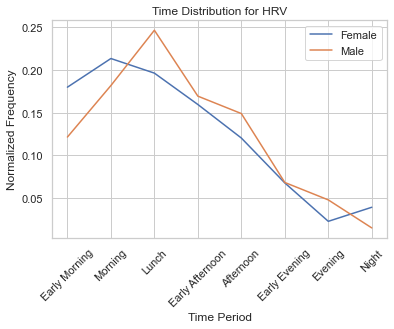

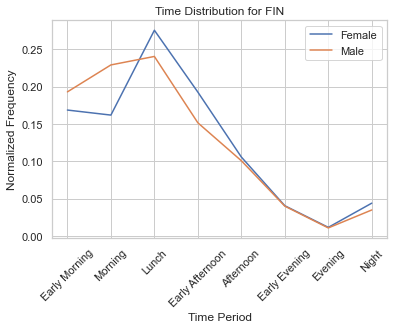

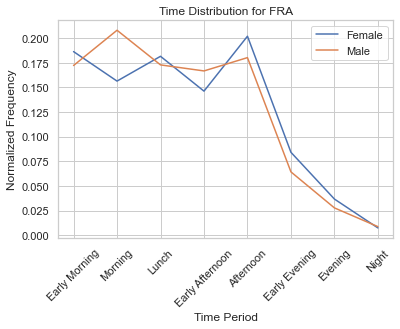

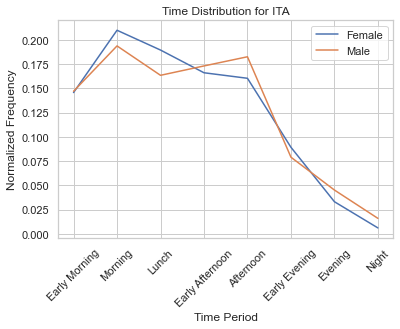

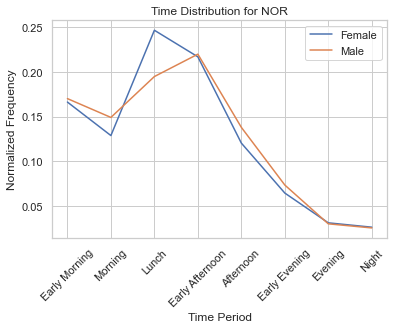

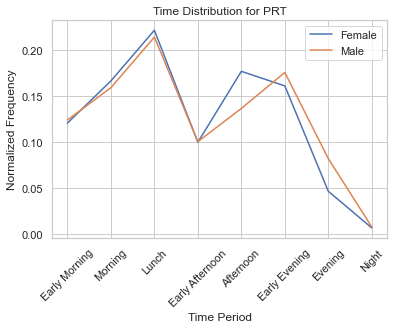

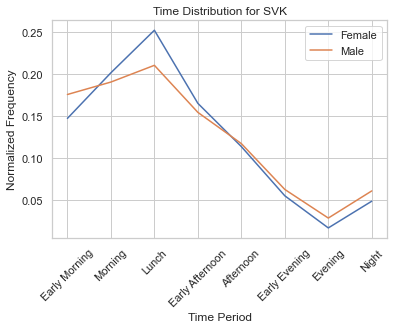

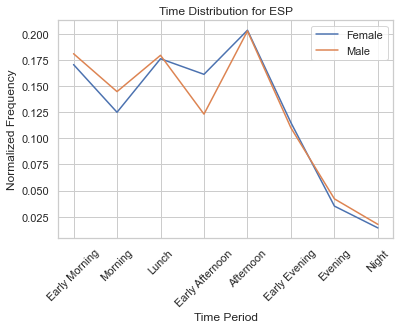

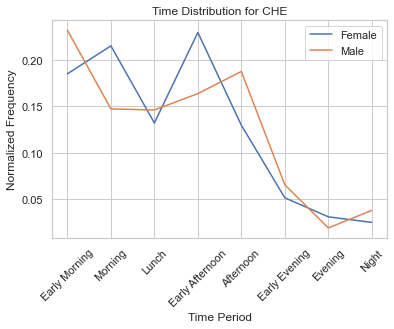

In [33]:
campaigns = legs_df['campaign'].unique()
time_periods_order = ['Early Morning', 'Morning', 'Lunch', 'Early Afternoon', 'Afternoon', 'Early Evening', 'Evening', 'Night']

# Iterate over campaigns
for campaign in campaigns:
    # Filter data for the current campaign
    campaign_data = legs_df[legs_df['campaign'] == campaign]

    # Calculate time distribution
    time_dist = campaign_data.groupby(['gender', 'TimePeriod']).size() / campaign_data.dropna(subset=['TimePeriod']).groupby(['gender']).size()
    time_dist = time_dist.reindex(time_periods_order, level='TimePeriod')
    
    # Plot the graph for the current campaign
    sns.lineplot(x=time_dist['Female'].index, y=time_dist['Female'].values, legend='brief', label='Female')
    sns.lineplot(x=time_dist['Male'].index, y=time_dist['Male'].values, legend='brief', label='Male')
    #sns.lineplot(x=time_dist['Other'].index, y=time_dist['Other'].values, legend='brief', label='Other')
    
    plt.xticks(rotation=45)
    plt.title(f'Time Distribution for {campaign}')
    plt.xlabel('Time Period')
    plt.ylabel('Normalized Frequency')
    plt.legend()
    plt.show()
